In [1]:
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
import inferpy as inf
import tensorflow_probability as tfp

In [2]:
dirname = os.getcwd()
print(dirname)
root = os.path.dirname(dirname)
print(root)
file_path = os.path.join(root, 'Data/TD Total NL 20201023 CAL.xlsm')
print(file_path)

/home/pshah/Documents/GitRepos/BayesianInferenceDataScience/InferPy
/home/pshah/Documents/GitRepos/BayesianInferenceDataScience
/home/pshah/Documents/GitRepos/BayesianInferenceDataScience/Data/TD Total NL 20201023 CAL.xlsm


In [3]:
import pandas as pd
df_temp = pd.read_excel(open(file_path,'rb'), sheet_name='MetOcean')

In [4]:
len(df_temp['Smoothed Mean'].values)

10957

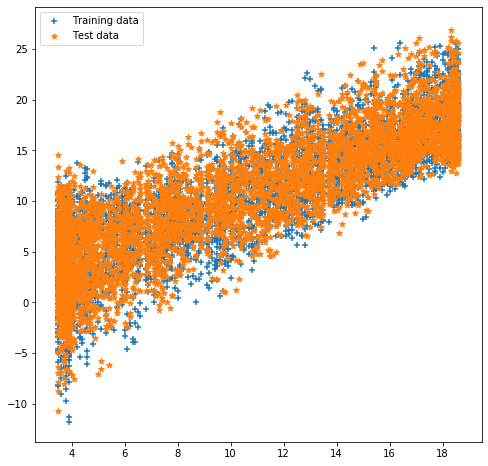

In [135]:
x_train = df_temp['Smoothed Mean'].values[1:5000]
y_train = df_temp['Air_Temp'].values[1:5000]
x_test = df_temp['Smoothed Mean'].values[5001:10000]
y_test = df_temp['Air_Temp'].values[5001:10000]
plt.figure(figsize=(8, 8))
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.scatter(x_test, y_test, marker='*', label='Test data')
plt.legend();

In [6]:
# NSAMPLE = 100
# x_train = np.float32(np.random.uniform(-10.5, 10.5, (1, NSAMPLE))).T
# r_train = np.float32(np.random.normal(size=(NSAMPLE,1),scale=1.0))
# y_train = np.float32(np.sin(0.75*x_train)*7.0+x_train*0.5+r_train*1.0)

# plt.figure(figsize=(8, 8))
# plt.scatter(x_train, y_train, marker='+', label='Training data')
# plt.legend();

In [63]:
NHIDDEN = 20

nnetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(NHIDDEN, activation=tf.nn.tanh),
    tf.keras.layers.Dense(1)
])

lossfunc = lambda y_out, y: tf.nn.l2_loss(y_out-y)

nnetwork.compile(tf.train.AdamOptimizer(0.01), lossfunc)
nnetwork.fit(x=x_train, y=y_train, epochs=300)

Train on 4999 samples
Epoch 1/300
4999/4999 [==============================] - 1s 220us/sample - loss: 694.1104
Epoch 2/300
4999/4999 [==============================] - 0s 29us/sample - loss: 200.5895
Epoch 3/300
4999/4999 [==============================] - 0s 30us/sample - loss: 185.0607
Epoch 4/300
4999/4999 [==============================] - 0s 29us/sample - loss: 180.0033
Epoch 5/300
4999/4999 [==============================] - 0s 28us/sample - loss: 175.9637
Epoch 6/300
4999/4999 [==============================] - 0s 29us/sample - loss: 174.8931
Epoch 7/300
4999/4999 [==============================] - 0s 31us/sample - loss: 175.2885
Epoch 8/300
4999/4999 [==============================] - 0s 29us/sample - loss: 174.3154
Epoch 9/300
4999/4999 [==============================] - 0s 29us/sample - loss: 175.4204
Epoch 10/300
4999/4999 [==============================] - 0s 29us/sample - loss: 176.8316
Epoch 11/300
4999/4999 [==============================] - 0s 28us/sample - loss: 174.5

4999/4999 [==============================] - 0s 29us/sample - loss: 172.8176
Epoch 92/300
4999/4999 [==============================] - 0s 30us/sample - loss: 173.8611
Epoch 93/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.9009
Epoch 94/300
4999/4999 [==============================] - 0s 29us/sample - loss: 173.3233
Epoch 95/300
4999/4999 [==============================] - 0s 31us/sample - loss: 174.3931
Epoch 96/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.6205
Epoch 97/300
4999/4999 [==============================] - 0s 34us/sample - loss: 173.3700
Epoch 98/300
4999/4999 [==============================] - 0s 30us/sample - loss: 173.1385
Epoch 99/300
4999/4999 [==============================] - 0s 30us/sample - loss: 172.5593
Epoch 100/300
4999/4999 [==============================] - 0s 28us/sample - loss: 172.5289
Epoch 101/300
4999/4999 [==============================] - 0s 29us/sample - loss: 173.1770
Epoch 102/300
4999/49

4999/4999 [==============================] - 0s 29us/sample - loss: 172.0160
Epoch 182/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.0869
Epoch 183/300
4999/4999 [==============================] - 0s 30us/sample - loss: 171.1770
Epoch 184/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.1141
Epoch 185/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.3142
Epoch 186/300
4999/4999 [==============================] - 0s 28us/sample - loss: 172.5055
Epoch 187/300
4999/4999 [==============================] - 0s 28us/sample - loss: 173.9160
Epoch 188/300
4999/4999 [==============================] - 0s 28us/sample - loss: 171.9660
Epoch 189/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.7055
Epoch 190/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.2204
Epoch 191/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.9722
Epoch 192/300

4999/4999 [==============================] - 0s 30us/sample - loss: 171.4807
Epoch 272/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.0953
Epoch 273/300
4999/4999 [==============================] - 0s 31us/sample - loss: 172.1146
Epoch 274/300
4999/4999 [==============================] - 0s 29us/sample - loss: 172.2760
Epoch 275/300
4999/4999 [==============================] - 0s 29us/sample - loss: 171.4486
Epoch 276/300
4999/4999 [==============================] - 0s 29us/sample - loss: 171.5598
Epoch 277/300
4999/4999 [==============================] - 0s 29us/sample - loss: 171.8540
Epoch 278/300
4999/4999 [==============================] - 0s 29us/sample - loss: 171.3688
Epoch 279/300
4999/4999 [==============================] - 0s 28us/sample - loss: 172.1959
Epoch 280/300
4999/4999 [==============================] - 0s 28us/sample - loss: 172.0400
Epoch 281/300
4999/4999 [==============================] - 0s 29us/sample - loss: 171.3120
Epoch 282/300

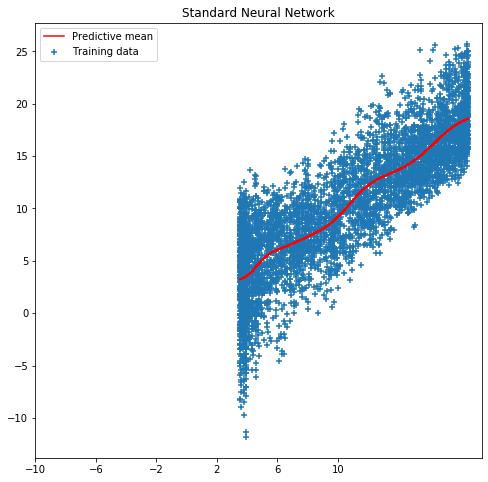

In [64]:
sess = tf.keras.backend.get_session()
#x_test = np.float32(np.arange(10.0,18.5,0.1))
x_test = df_temp['Smoothed Mean'].values[5001:10000]
x_test = x_test.reshape(x_test.size,1)
y_pred = sess.run(nnetwork(x_test))

plt.figure(figsize=(8, 8))
plt.plot(x_test, y_pred, 'r-', label='Predictive mean');
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.xticks(np.arange(-10., 10.5, 4))
plt.title('Standard Neural Network')
plt.legend();

In [75]:
@inf.probmodel
def model(NHIDDEN):

    with inf.datamodel():
        x = inf.Normal(loc = tf.zeros([1]), scale = 1.0, name="x")

        nnetwork = inf.layers.Sequential([
            tfp.layers.DenseFlipout(NHIDDEN, activation=tf.nn.tanh),
            tfp.layers.DenseFlipout(1)
        ])

        y = inf.Normal(loc = nnetwork(x) , scale= 3., name="y")

In [76]:
@inf.probmodel
def qmodel():
    pass

In [92]:
NHIDDEN=20

p = model(NHIDDEN)
q = qmodel()

VI = inf.inference.VI(q, optimizer = tf.train.AdamOptimizer(0.01), epochs=5000)

p.fit({"x": x_train, "y": y_train}, VI)


 0 epochs	 398028.4375....................
 200 epochs	 368038.625....................
 400 epochs	 367832.8125....................
 600 epochs	 367724.9375....................
 800 epochs	 367670.15625....................
 1000 epochs	 367666.25....................
 1200 epochs	 367644.25....................
 1400 epochs	 367641.6875....................
 1600 epochs	 367638.28125....................
 1800 epochs	 367644.4375....................
 2000 epochs	 367637.375....................
 2200 epochs	 367640.4375....................
 2400 epochs	 367634.40625....................
 2600 epochs	 367633.6875....................
 2800 epochs	 367631.25....................
 3000 epochs	 367633.875....................
 3200 epochs	 367633.03125....................
 3400 epochs	 367635.6875....................
 3600 epochs	 367634.96875....................
 3800 epochs	 367632.625....................
 4000 epochs	 367633.5....................
 4200 epochs	 367631.46875....................
 

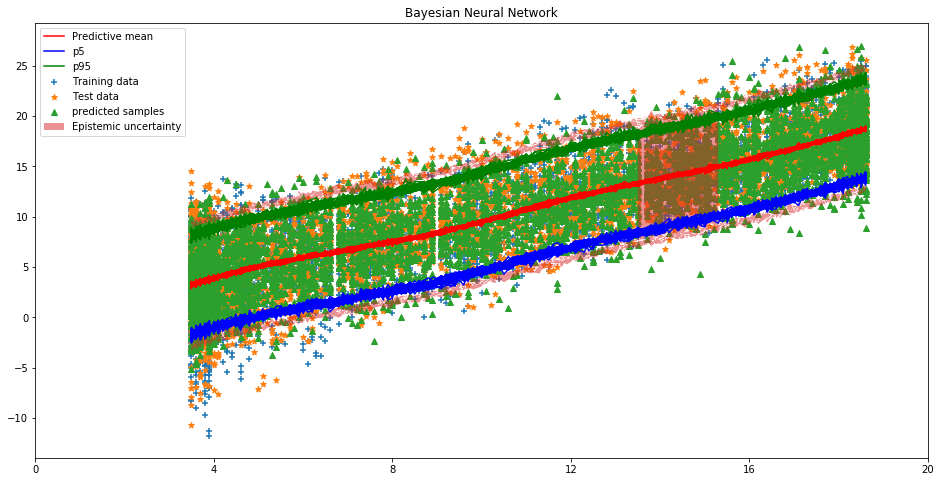

In [126]:
# x_test = np.linspace(-20.5, 20.5, NSAMPLE).reshape(-1, 1)
x_test = x_test.reshape(-1,1)

plt.figure(figsize=(16, 8))

y_pred_list = []
for i in range(500):
    y_pred = p.posterior_predictive(["y"], data = {"x": x_test}).sample()
    y_pred_list.append(y_pred)

y_preds = np.concatenate(y_pred_list, axis=1)
y_p5 = np.percentile(y_preds, 5, axis=1)
y_p50 = np.percentile(y_preds, 50, axis=1)
y_p95 = np.percentile(y_preds, 95, axis=1)
y_mean = np.mean(y_preds, axis=1)
y_sigma = np.std(y_preds, axis=1)

plt.plot(x_test, y_mean, 'r-', label='Predictive mean');
# plt.plot(x_test, y_test, 'y-', label='Test data');
plt.plot(x_test, y_p5, 'b-', label='p5');
plt.plot(x_test, y_p95, 'g-', label='p95');
plt.scatter(x_train, y_train, marker='+', label='Training data')
plt.scatter(x_test, y_test, marker='*', label='Test data')
plt.scatter(x_test, y_pred, marker='^', label='predicted samples')
plt.fill_between(x_test.ravel(),
                 y_mean + 2 * y_sigma,
                 y_mean - 2 * y_sigma,
                 alpha=0.5, label='Epistemic uncertainty')
plt.xticks(np.arange(0., 20.5, 4))
plt.title('Bayesian Neural Network')
plt.legend();

In [184]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

y_pred_ma = moving_average(y_pred, 2)

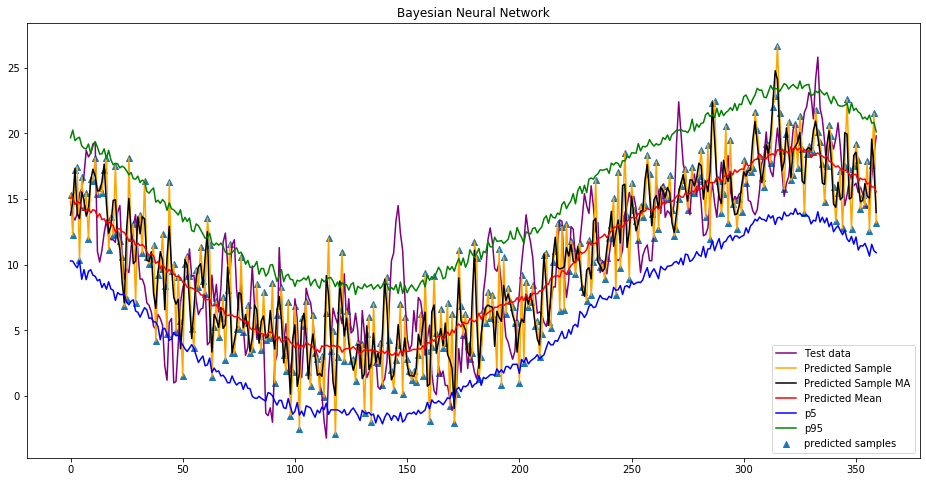

In [185]:
n_samples = 360

plt.figure(figsize=(16, 8))
plt.plot(y_test[0:n_samples], 'purple', label='Test data');
plt.plot(y_pred[0:n_samples], 'orange', label='Predicted Sample');
plt.plot(y_pred_ma[0:n_samples], 'black', label='Predicted Sample MA');
plt.plot(y_mean[0:n_samples], 'red', label='Predicted Mean');
plt.plot(y_p5[0:n_samples], 'blue', label='p5');
plt.plot(y_p95[0:n_samples], 'green', label='p95');

# plt.scatter(np.arange(n_samples),y_test[0:n_samples], marker='*', label='Test data')
plt.scatter(np.arange(n_samples), y_pred[0:n_samples], marker='^', label='predicted samples')

plt.title('Bayesian Neural Network')
plt.legend();

In [186]:
print("cumulative absolute difference of actual data: ", np.sum(np.abs(np.diff(y_test))))
print("cumulative absolute difference of predicted sample: ", np.sum(np.abs(np.diff(y_pred.flatten()))))
print("cumulative absolute difference of predicted sample ma: ", np.sum(np.abs(np.diff(y_pred_ma))))

cumulative absolute difference of actual data:  7579.5
cumulative absolute difference of predicted sample:  17072.877
cumulative absolute difference of predicted sample ma:  8517.58687388897


In [187]:
print("standard deviation of actual data: ", np.std(y_test))
print("standard deviation of predicted sample: ", np.std(y_pred.flatten()))
print("standard deviation of predicted sample ma: ", np.std(y_pred_ma))

standard deviation of actual data:  6.1489716651665836
standard deviation of predicted sample:  6.0130033
standard deviation of predicted sample ma:  5.622381425458592


In [74]:
p.posterior_predictive(["y"], data = {"x": x_test}).parameters()

{'loc': array([[14.939491 ],
        [14.746648 ],
        [14.6440935],
        ...,
        [13.267976 ],
        [13.362683 ],
        [13.439466 ]], dtype=float32),
 'scale': 2.0,
 'validate_args': False,
 'allow_nan_stats': True,
 'name': 'y'}